<a href="https://colab.research.google.com/github/YIBoX-memorial/ComputationalNeuroscience/blob/master/TNC3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.io
from math import exp
from math import log
from math import cos
from math import sin
from math import pi
from math import ceil
from math import sqrt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
! nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# Constant

In [ ]:
class CST:
    __delta__ = 0.002 # s
    __GPU = False
    __default__ = 0.002
    def __init(self):
        pass
    @classmethod
    def delta(cls):
        return cls.__delta__
    @classmethod
    def GPU(cls):
        return cls.__GPU
    def set_delta(cls, x):
        cls.__default__ = cls.__delta__
        cls.__delta__ = x
    def reset_delta(cls):
        cls.__delta__ =  cls.__default__

def pos(x):
    return int(x / CST.delta())

def s2ms(x):
    return 1000*x

def ms2s(x):
    return x/1000.0

# CST.set_delta(CST, 0.1)
# print(CST.delta())
# CST.reset_delta(CST)
# print(CST.delta())

# Function

Definition of functions.

In [ ]:
class Func:
    def __init__(self, *args, **kwargs):
        pass
    def value(self, x:float=0.0, *args, **kwargs):
        pass
    def __call__(self, input, *args, **kwargs):
        return self.value(input)

class Const(Func):
    def __init__(self, value:float=0.0, *args, **kwargs):
        self.__value = value
    def value(self, x:float=0.0, *args, **kwargs):
        return self.__value

class Refractory_Func(Func):
    def __init__(self, r0:float=0.0, ref_period:float=1.0, *args, **kwargs):
        self.__r0 = r0
        self.__ref_period = ref_period
    def value(self, x:float=0.0, *args, **kwargs):
        try:
            return self.__r0 * ( 1 - exp(-x/self.__ref_period) )
        except:
            print('x: ', x)



# Problem 1

Suppose that the probabilities that a neuron responds with a firing rate between \\(r\\) and \\(r+\Delta r\\) to two stimuli labeled plus and minus are \\(p[r|\pm]\Delta r\\) where

\\(p[r|\pm]=\frac{1}{\sqrt{2\pi}\sigma_r}\exp\left(-\frac{1}{2}\left(\frac{1-\langle r\rangle_\pm}{\sigma_r}\right)^2\right)\\)

Assume that the two mean rate parameters \\(\langle r\rangle_+\\) and\\(\langle r\rangle_-\\) and the single variance \\(\sigma^2_r\\) are chosen so that these distributions produce negative rates rarely enough that we can integrate over \\(r\\) values over the entire range \\(-\infty< r<+\infty\\). Suppose that you base discrimination of the plus and minus stimuli on whether the evoked firing rate is greater or less than a threshold \\(z\\). Show that the size and power, \\(\alpha(z)\\) and \\(\beta(z)\\) of this test are given by

\\(\alpha(z)=\frac{1}{2}\text{erfc}\left(\frac{z-\langle r\rangle_-}{\sqrt{2}\sigma_r}\right)\\)

\\(\beta(z)=\frac{1}{2}\text{erfc}\left(\frac{z-\langle r\rangle_+}{\sqrt{2}\sigma_r}\right)\\)

Show that the probability of a correct answer in the associated two-alternative forced choice task involving discriminating between plus-then-minus and minus-then-plus presentations of the two stimuli is given by equation

\\(P[\text{correct}]=\frac{1}{2}\text{erfc}\left(\frac{\langle r\rangle_--\langle r\rangle_+}{\sqrt{2}\sigma_r}\right)=\frac{1}{2}\text{erfc}(d'/2)\\)(3.10).
 
Also, derive the result of equation

\\(P[+|r]=\frac{1}{1+\exp(-d'(r-r_\text{ave})/\sigma_r)}\\)(3.17).

Plot ROC curves for di erent values of the discriminability

\\(d'=\frac{\langle r\rangle_+-\langle r\rangle_-}{\sigma_r}\\)

By simulation, determine the fraction of correct discriminations that can be made in the two-alternative forced choice task. Show that the fractions of correct answer for di erent values of \\(d'\\) are equal to the areas under the corresponding ROC curves.



# Solution 1

First, recall the definition of error function

\\(\text{erfc}(x)=\frac{2}{\sqrt{\pi}}\int_x^\infty dy\ \exp(-y^2)\\)

and \\(P[\text{correct}]=\int_0^1 d\alpha\ \beta\\)

\\(\beta/\alpha=\text{erfc}\left(\frac{\langle r\rangle_--\langle r\rangle_+}{\sqrt{2}\sigma_r}\right)\\)

\\(P[\text{correct}]=\int_0^1 d\alpha\ \text{erfc}\left(\frac{\langle r\rangle_--\langle r\rangle_+}{\sqrt{2}\sigma_r}\right)\alpha=\frac{1}{2}\text{erfc}\left(\frac{\langle r\rangle_--\langle r\rangle_+}{\sqrt{2}\sigma_r}\right)\\)

Then we compute \\(P[+|r]\\),

\\(P[+|r]=P[r|+]P[+]/P[r]=\frac{p[r|+]}{2\times\frac{1}{2}(P[r|-]+P[r|+])}=\\)(3.17)

# Problem 2

Simulate the random-dot discrimination experiment. Denote the stimulus by plus or minus, corresponding to the two directions of motion.

On each trial, choose the stimulus randomly with equal probability for the two cases.

When the minus stimulus is chosen, generate the responses of the neuron as \\(20\text{Hz}\\) plus a random Gaussian term with a standard deviation of \\(10\text{Hz}\\) (set any rates that come out negative to zero).

When the plus stimulus is chosen, generate the responses as \\(20+10d\text{Hz}\\) plus a random Gaussian term with a standard deviation of \\(10\text{Hz}\\), where \\(d\\) is the discriminability (again, set any rates that come out negative to zero). First, choose a threshold \\(z=20+5d\\), which is half-way between the means of the two response distributions.

Whenever \\(r\geq z\\) guess “plus”, otherwise guess “minus”. Over a large number of trials (1000, for example) determine how often you get the right answer for different \\(d\\) values.

Plot the percent correct as a function of \\(d\\) over the range \\(0\leq d\leq 10\\). Next, by allowing \\(z\\) to vary over a range, plot ROC curves for several values of \\(d\\) (starting with \\(d=2\\)).

To do this, determine how frequently the guess is “plus” when the stimulus is, in fact, plus (this is \\(\beta\\)), and how often the guess is “plus” when the real stimulus is minus (this is \\(\alpha\\)). Then, plot versus for \\(z\\) over the range \\(0\leq z\leq 140\\).


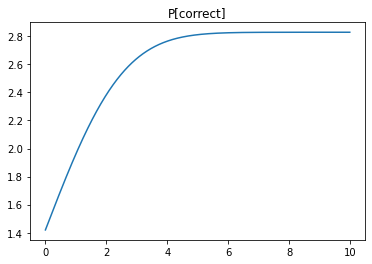

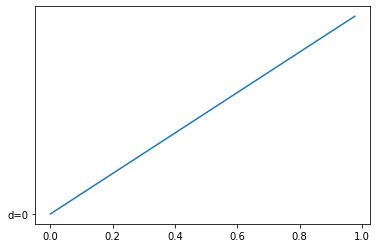

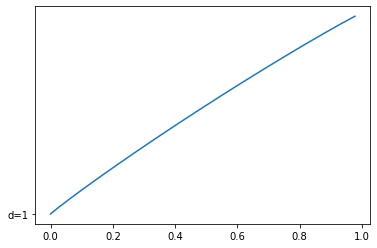

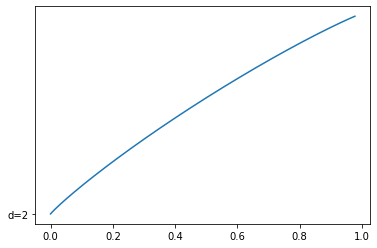

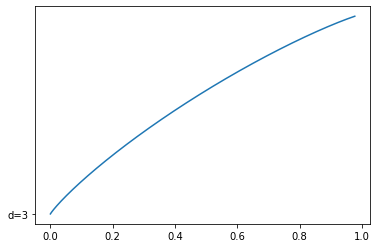

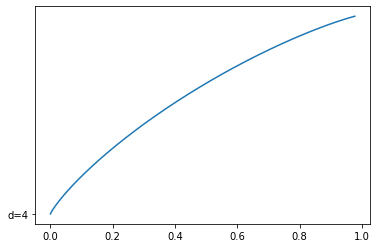

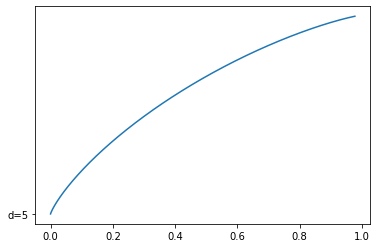

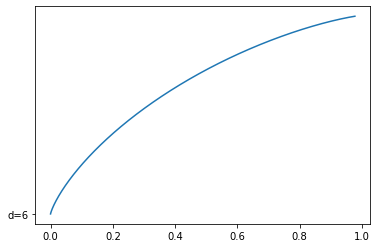

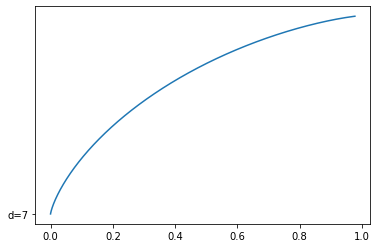

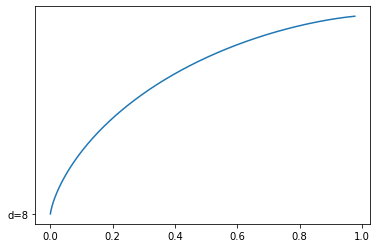

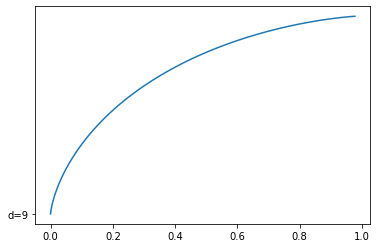

In [ ]:
class P2:
    def __minimum_interval__(self):
        return 0.01
    def __MIN__(self):
        return 0.0
    def __MAX__(self):
        return 200.0
    class Gaussian(Func):
        def __init__(self, mean:float=0.0, stdd:float=0.0):
            self.__mean__ = mean
            self.__stdd__ = stdd
        def value(self, x):
            return np.exp(-(x-self.__mean__)**2/(2*self.__stdd__**2))/(sqrt(2*pi)*self.__stdd__)
    def G_int(self, func, low_bound, high_bound):
        x = np.arange(low_bound, high_bound, self.__minimum_interval__())
        y = func(x)
        ret = np.sum(y) * self.__minimum_interval__()
        return ret
    class ERFC(Func):
        def __init__(self, func):
            x = np.arange(0, 200, 0.01)
            y = func(x)
            self.__ret__ = y
            for iter in range(self.__ret__.size-2, -1, -1):
                self.__ret__[iter] = self.__ret__[iter] + self.__ret__[iter+1]
            self.__ret__ = self.__ret__ * 0.01
        def value(self, x):
            x = x / 0.01
            x = x.astype(int)
            return self.__ret__[x]
    def __init__(self):
        pass
    def __plot_ROC__(self, alpha, beta, title=''):
        x = np.arange(self.__MIN__(), self.__MAX__(), self.__minimum_interval__())
        x = np.flip(x)
        z1 = alpha(x)
        z2 = beta(x)
        plt.plot(z1, z2)
        plt.plot(title)
        plt.show()
    def __plot_correct__(self):
        d = np.arange(0, 10.0, self.__minimum_interval__())
        std_normal = self.Gaussian(mean=0.0, stdd=1.0)
        erfc_d = np.zeros(d.size)
        for (index, value) in enumerate(d):
            erfc_d[index] = sqrt(2.0)*2*self.G_int(std_normal, -value/2, self.__MAX__())
        plt.plot(d, erfc_d)
        plt.title('P[correct]')
        plt.show()
    def __process__(self):
        self.__plot_correct__()
        for d in range(0, 10, 1):
            alpha = self.ERFC(self.Gaussian(mean=20, stdd=10.0))
            beta = self.ERFC(self.Gaussian(mean=20+d, stdd=10.0))
            self.__plot_ROC__(alpha, beta, 'd=%d'%d)
    def __call__(self):
        self.__process__()

W2 = P2()
W2()

# Problem 3

Simulate the responses of four interneurons in the cercal system of the cricket and check the accuracy of a vector decoding scheme. For a true wind direction \\(\theta\\), the average firing rates of the four interneurons should be generated as

\\(\langle r_i\rangle=[50\text{Hz}\cos(\theta-\theta_i)]_+\\)

where \\(\theta_i=\pi/4,3\pi/4,5\pi/4,7\pi/4\\) for \\(i=1,2,3,4\\). The actual rates, \\(r_i\\), are then obtained by adding to these mean rates a random number chosen from a Gaussian distribution with zero mean and a standard deviation of \\(5\text{Hz}\\) (set any rates the come out negative to zero).

From these rates, construct the \\(x\\) and \\(y\\) components of the population vector

\\(x=\sum_{i=1}^4r_i\cos\theta_i\\) and \\(y=\sum_{i=1}^4r_i\sin\theta_i\\)

and, from the direction of this vector, compute an estimate est of the wind direction.

Average the squared difference \\((\theta-\theta_\text{est})^2\\) over 1000 trials.

The square root of of this quantity is the error. Plot the error as a function of \\(\theta\\) over the range \\(-90^\circ\leq\theta\leq 90^\circ\\).

Trivial, omit it.


# Problem 4

Show that if an infinite number of unit vectors \\(\vec{c}_a\\) is chosen uniformly from a probability distribution that is independent of direction,\\(\sum(\vec{v}\cdot\vec{c}_a)\vec{c}_a\propto\vec{v}\\) for any vector \\(\vec{v}\\). How does the sum approach this limit for a finite number of terms?


# Solution 4

Suppose that \\(\vec{v}\\) is a unit vector with azimuth \\(\phi\\).

\\(\int_0^{2\pi}d\theta\ \cos(\theta-\phi)(\cos\theta,\sin\theta)=\frac{1}{2}(\cos\theta,\sin\theta)\\)

# Problem 5

Show that the Bayesian estimator that minimizes the expected average value of the the loss function \\(L(s, s_\text{bayes})=(s-s_\text{bayes})^2\\) is the mean of the distribution \\(p[s|r]\\), given by equation

\\(s_\text{bayes}=\int ds\ p[s|r]s\\)(3.27).

Also show that the estimate that arises from minimizing the expected loss function \\(L(s, s_\text{bayes})=|s-s_\text{bayes}|\\) is the median of \\(p[s|r]\\).


# Solution 5

\\(\int ds\ p[s|r][(s-s_\text{bayes})^2]'=\int ds\ p[s|r](-2s+2s_\text{bayes})=0\\)

\\(\int ds\ p[s|r]|s-s_\text{bayes}|=\int_{s_\text{bayes}>s} ds\ p[s|r](-s+s_\text{bayes})+\int_{s_\text{bayes}< s} ds\ p[s|r](s-s_\text{bayes})=0\\)

The derivative of the second expression is

\\(\int_{s_\text{bayes}>s} ds\ p[s|r]-\int_{s_\text{bayes}< s} ds\ p[s|r]=0\\)

# Problem 6

Show that the equations for the Fisher information in equation (3.42) can also be written as in equation (3.43),

\\(I_F(s)=\langle-\frac{\partial^2\ln p[r|s]}{\partial s^2}\rangle\\)

\\(I_F(s)=\langle\left(\frac{\partial\ln p[r|s]}{\partial s}\right)^2\rangle\\)

Use the fact that \\(\int dr\ p[r|s]=1\\).



# Solution 6

\\(\langle\left(\frac{\partial\ln p[r|s]}{\partial s}\right)^2\rangle\\)

\\(=\langle\left(\frac{\partial p[r|s]/\partial s}{p[r|s]}\right)^2\rangle\\)

\\(=\int dr\ p[r|s]\frac{(\partial p[r|s]/\partial s)^2}{p[r|s]^2}\\)

Bacause

\\(\int dr\ p[r|s]\frac{(\partial^2 p[r|s]/\partial s^2)p[r|s]}{p[r|s]^2}\\)

\\(=\int dr\frac{\partial^2 p[r|s]}{\partial s^2}\\)

\\(=\frac{\partial^2 \int dr\ p[r|s]}{\partial s^2}=0\\)

We deduce the result that

\\(\int dr\ p[r|s]\frac{\partial^2\ln p[r|s]}{\partial s^2}\\)

\\(=\int dr\ p[r|s]\frac{p''[r|s]p[r|s]-p'[r|s]^2}{p[r|s]^2}\\)

\\(=\int dr\ p[r|s]\frac{-p'[r|s]^2}{p[r|s]^2}\\)

\\(=-\int dr\ p[r|s]\frac{(\partial p[r|s]/\partial s)^2}{p[r|s]^2}\\)

# Problem 7

The discriminability for the variable \\(Z\\) defined in equation

\\(Z(r)=\frac{\partial\ln p[r|s]}{\partial s}\\)(3.19)

is the difference between the average \\(Z\\) values for the two stimuli \\(s+\Delta s\\) and \\(s\\) divided by the standard deviation of \\(Z\\). The average of the difference in \\(Z\\) values is

\\(\langle\Delta Z\rangle=\int dr\ \frac{\partial\ln p[r|s]}{\partial s}(p[r|s+\Delta s]-p[r|s])\\)

Show that for small \\(\Delta s\\), \\(\langle\Delta Z\rangle=I_F(s)\Delta s\\). Also prove that the average value of Z,

\\(\langle Z\rangle=\int dr\ p[r|s]\frac{\partial\ln p[r|s]}{\partial s}\\)

is zero, and that the variance of \\(Z\\) is \\(I_F(s)\\). Computing the ratio, 
we find from these results that \\(d'=\Delta s\sqrt{I_F(s)}\\) which matches the discriminability (3.49) of the ML estimator.




# Solution 7

As \\(\Delta s\\) goes to zero.

\\(\langle\Delta Z\rangle=\int dr\ \frac{\partial \ln p[r|s]}{\partial s}\frac{\partial \ln p[r|s]}{\partial s}p[r|s]\Delta s=\Delta s I_F(s)\\)

The average value of \\(Z\\) is

\\(\langle Z\rangle=\int dr\ p[r|s]\frac{\partial p[r|s]/\partial s}{p[r|s]}=0\\)

The variance of \\(Z\\) is

\\(\sigma^2=\int dr\ p[r|s]\left(\frac{\partial p[r|s]}{\partial s}\right)^2\\)


# Problem 8

Extend equation 

\\(I_F(s)=T\sum_{a=1}^N\frac{r_\text{max}(s-s_a)^2}{\sigma^4_r}\exp\left(-\frac{1}{2}\left(\frac{s-s_a}{\sigma_r}\right)^2\right)\\)(3.46)

to the case of neurons encoding a D-dimensional vector stimulus \\(\vec{s}\\) with tuning curves given by

\\(f_a(\vec{s})=r_\text{max}\exp\left(-\frac{|\vec{s}-\vec{s}_a|^2}{2\sigma^2_r}\right)\\)

and perform the sum by approximating it as an integral over uniformly and densely distributed values of \\(\vec{s}_a\\) to derive the result in equation 3.48.



# Solution 8

Suppose that \\(\vec{s}_a\\) is uniformly distributed

\\(I_F(s)=T\sum_{a=1}^N\frac{(f'_a(s))^2}{f_a(s)}\\)

\\(=T\sum_{a=1}^N r_\text{max}\frac{(\partial\exp(-|\vec{s}-\vec{s}_a|^2/2\sigma^2_r)/\partial s)^2}{\exp(-|\vec{s}-\vec{s}_a|/2\sigma^2_r)}\\)

\\(=T\sum_{a=1}^N\frac{r_\text{max}\sum_{k=1}^D(s^{(k)}-s_a^{(k)})^2}{D^2\sigma^4_r}\exp\left(-\frac{1}{2}\frac{\sum_{k=1}^D(s^{(k)}-s_a^{(k)})^2}{\sigma_r^2}\right)\\)

\\(\approx T\int_{-\infty}^{\infty}ds_a^{(1)}\cdots\int_{-\infty}^{\infty}ds_a^{(D)}\ \frac{r_\text{max}\sum_{k=1}^D(s^{(k)}-s_a^{(k)})^2}{D^2\sigma^4_r}\prod_{k=1}^D\exp\left(-\frac{1}{2}\frac{(s^{(k)}-s_a^{(k)})^2}{\sigma_r^2}\right)\\)

\\(\approx T\int_{-\infty}^{\infty}ds_a^{(1)}\cdots\int_{-\infty}^{\infty}ds_a^{(D-1)}\ \prod_{k=1}^{D-1}\exp\left(-\frac{1}{2}\frac{(s^{(k)}-s_a^{(k)})^2}{\sigma_r^2}\right)\left(\frac{\sqrt{2\pi}\rho_s\sigma_rr_\text{max}T}{D^2\sigma^2_r}+\frac{r_\text{max}\sum_{k=1}^{D-1}(s^{(k)}-s_a^{(k)})^2}{D^2\sigma^4_r}\sqrt{2\pi}\sigma_r\right)\\)

\\(\approx\frac{D(\sqrt{2\pi}\sigma_r)^D\rho_sr_\text{max}T}{D^2\sigma_r^2}\\)

# Problem 9

Derive equation 3.54 by minimizing the expression 3.53. Use the methods of appendix A of chapter 2.

Trivial, omit it.

# Problem 10
Fourier transform exercise with a relatively complex code, omit it.